<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

Современные сети крайне сложные и глубокие, стали гораздо глубже, чем раньше. Стали чаще использоваться функции активации ReLU вместо tanh и sigmoid. Также появились новые структурные идеи, например как в ResNet, где часть инпута с предыдущего слоя обрабатывается несколькими простыми фильтрами, а затем складывается с самим инпутом (и такая конструкция повторяется несколько раз).

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

Сложные модели = требуется много вычислений.

Очень глубокие сети сильно зависят от предобработки данных - небольшой шум во входных данных может получить далекие последствия в конце сети.

Слишком много параметров для подбора (миллионы) = угроза слишком сложной модели, переобучение.

Неправильная структура частей сети.

Важен вопрос с подбором функции активации, неправильный выбор может загасить половину нейронов в 0, либо напротив 
устремить градиенты в бесконечность.


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? Что делать, если первый вариант решения не заработает?

Основная проблема - переобучение. На тестовой выборке практически сразу получится нулевой loss, градиент занулится, а сеть переобучится под трайн выборку, по сути сможет отделить каждый конкретный объект из train. 

Также каждый прогон датасета может оказывать малое влияние на коэффициенты.

Решается с помощью data augmentation - генерация кучи других сэмплов путем небольшого изменения и искажения имеющихся.
Также возможно стоит увеличить количество эпох.

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

???

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  13.5M      0  0:00:12  0:00:12 --:--:-- 6975k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [2]:
!ls

cifar10  cifar-10-python.tar.gz  datalab


In [0]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [4]:
tf.__version__

'1.7.0'

In [5]:
tf.test.is_gpu_available()

True

In [0]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_train = X_train.transpose(0, 2, 3, 1)
X_test  = X_test.transpose(0, 2, 3, 1)

X_train, X_test = X_train / 255, X_test  / 255
mean, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mean) / std, (X_test - mean) / std

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [9]:
print('Train', X_train.shape, 'val', X_val.shape, 'test', X_test.shape)

Train (45000, 32, 32, 3) val (5000, 32, 32, 3) test (10000, 32, 32, 3)


In [0]:
def draw_samples():
  for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('int64'))#.transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
  plt.show()

In [0]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

# draw_samples()

In [12]:
X_train.shape

(45000, 32, 32, 3)

In [13]:
type(X_train[0, 0, 0, 0])

numpy.float64

In [0]:
# Write your convolutional NN with Tensorflow (example in seminar).
# For example 3 convolutions and poolings and dense layer after that.

l2reg = tf.contrib.layers.l2_regularizer(scale=1e-4)

cust_learning_rate = tf.placeholder(tf.float32, shape=[])
cust_mode = tf.placeholder(tf.bool, shape=[])

input_layer = tf.placeholder(
    tf.float32, 
    shape=[None, 32, 32, 3], 
    name="input"
)

# Convolutional Layer #1
conv1 = tf.layers.conv2d(
    inputs=input_layer,
    filters=32, 
    kernel_size=[3, 3],
    padding="same",
    activation=tf.nn.relu,
    kernel_regularizer=l2reg
)

batch_norm1 = tf.layers.batch_normalization(
    inputs=conv1,
    axis=3
)

# # Pooling Layer #2
# pool1 = tf.layers.max_pooling2d(
#     inputs=, 
#     pool_size=[2, 2], 
#     strides=2)



# Convolutional Layer #2 
conv2 = tf.layers.conv2d(
    inputs=batch_norm1,
    filters=32,
    kernel_size=[3, 3],
    padding="same",
    activation=tf.nn.relu,
    kernel_regularizer=l2reg)

# pool2 = tf.layers.max_pooling2d(
#     inputs=conv2, 
#     pool_size=[2, 2], 
#     strides=2)

batch_norm2 = tf.layers.batch_normalization(
    inputs=conv2,
    axis=3
)

pool2 = tf.layers.max_pooling2d(
    inputs=batch_norm2, 
    pool_size=[2, 2], 
    strides=2)

dropout2 = tf.layers.dropout(
    inputs=pool2, 
    rate=0.2,
    training=cust_mode)











conv3 = tf.layers.conv2d(
    inputs=dropout2,
    filters=64,
    kernel_size=[3,3],
    padding="same",
    activation=tf.nn.relu,
    kernel_regularizer=l2reg)

batch_norm3 = tf.layers.batch_normalization(
    inputs=conv3,
    axis=3
)

conv4 = tf.layers.conv2d(
    inputs=batch_norm3,
    filters=64,
    kernel_size=[3, 3],
    padding="same",
    activation=tf.nn.relu,
    kernel_regularizer=l2reg
)

# pool2 = tf.layers._pooling2d(
#     inputs=conv4, 
#     pool_size=[2, 2], 
#     strides=2)

batch_norm4 = tf.layers.batch_normalization(
    inputs=conv4,
    axis=3
)

pool4 = tf.layers.max_pooling2d(
    inputs=batch_norm4, 
    pool_size=[2, 2], 
    strides=2)

dropout4 = tf.layers.dropout(
    inputs=pool4, 
    rate=0.3,
    training=cust_mode)




conv5 = tf.layers.conv2d(
    inputs=dropout4,
    filters=128,
    kernel_size=[3,3],
    padding="same",
    activation=tf.nn.relu,
    kernel_regularizer=l2reg)

batch_norm5 = tf.layers.batch_normalization(
    inputs=conv5,
    axis=3
)

conv6 = tf.layers.conv2d(
    inputs=batch_norm5,
    filters=128,
    kernel_size=[3, 3],
    padding="same",
    activation=tf.nn.relu,
    kernel_regularizer=l2reg
)

# pool2 = tf.layers._pooling2d(
#     inputs=conv4, 
#     pool_size=[2, 2], 
#     strides=2)

batch_norm6 = tf.layers.batch_normalization(
    inputs=conv6,
    axis=3
)

pool6 = tf.layers.max_pooling2d(
    inputs=batch_norm6, 
    pool_size=[2, 2], 
    strides=2)

dropout6 = tf.layers.dropout(
    inputs=pool6, 
    rate=0.4,
    training=cust_mode)



# Dense Layer
pool2_flat = tf.reshape(dropout6, [-1, 4 * 4 * 128])

dense2 = tf.layers.dense(
    inputs=pool2_flat, 
    units=512, 
    activation=tf.nn.relu)

logits = tf.layers.dense(inputs=dense2, units=10)#dropout, units=10)

# NETWORK FINISHES HERE ---

labels = tf.placeholder(tf.int64, name="labels")
predictions = tf.argmax(input=logits, axis=1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(labels, predictions), tf.float32))

loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
glstep = tf.train.get_global_step()
optimizer_step = tf.train.AdamOptimizer(learning_rate=cust_learning_rate).minimize(loss, global_step=glstep)

In [0]:
def train_fn(X, y, sess, lr):
    '''
    returns tuple (loss, accuracy) for model train phase
    '''
#     pass
#     print('debug! ', X.shape, y.shape)
#     optimizer_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss, global_step=glstep)

    sess.run(optimizer_step, feed_dict={input_layer : X, labels : y, cust_learning_rate : lr, cust_mode : True})   
    
    return (sess.run(loss,     feed_dict={input_layer : X, labels : y, cust_mode : True}), 
            sess.run(accuracy, feed_dict={input_layer : X, labels : y, cust_mode : True}))

def eval_fn(X, y, sess):
    '''
    returns tuple (loss, accuracy) for model evaluation  phase
    '''
#     pass
    return (sess.run(loss,     feed_dict={input_layer : X, labels : y, cust_mode : False}), 
            sess.run(accuracy, feed_dict={input_layer : X, labels : y, cust_mode : False}))


def predict_fn(X, sess):
    '''
    returns y_pred for model predict phase
    '''
#     pass
    return sess.run(predictions, feed_dict={input_layer : X, labels : y, cust_mode : False})


In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

Epoch 1...
learning step 0.00043689320388349515
Epoch 1 of 25 took 33.962s
  train loss:		1.478498
  train accuracy:		45.66 %
  valid loss:		1.147479
  valid accuracy:		59.84 %
Epoch 2...
learning step 0.00042416815911018943
Epoch 2 of 25 took 33.533s
  train loss:		0.995246
  train accuracy:		64.48 %
  valid loss:		0.877695
  valid accuracy:		68.91 %
Epoch 3...
learning step 0.00041181374670892177
Epoch 3 of 25 took 33.665s
  train loss:		0.794224
  train accuracy:		71.96 %
  valid loss:		0.743689
  valid accuracy:		73.78 %
Epoch 4...
learning step 0.00039981917156205996
Epoch 4 of 25 took 33.537s
  train loss:		0.670542
  train accuracy:		76.37 %
  valid loss:		0.671507
  valid accuracy:		76.04 %
Epoch 5...
learning step 0.00038817395297287375
Epoch 5 of 25 took 33.533s
  train loss:		0.576623
  train accuracy:		79.47 %
  valid loss:		0.625165
  valid accuracy:		77.46 %
Epoch 6...
learning step 0.0003768679155076444
Epoch 6 of 25 took 33.621s
  train loss:		0.509079
  train accuracy:

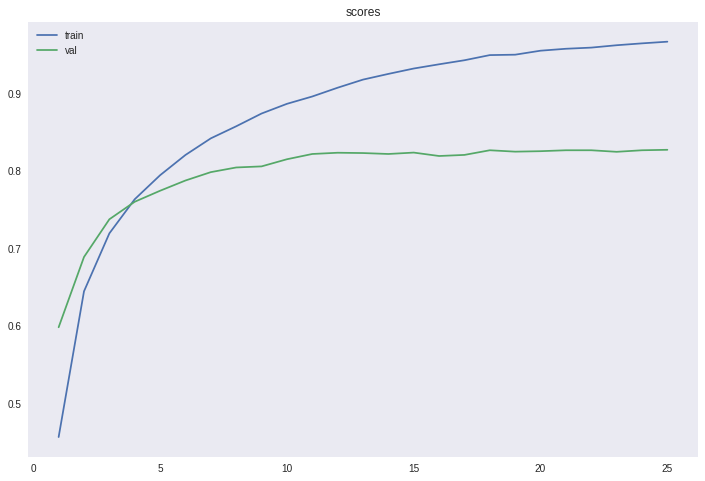

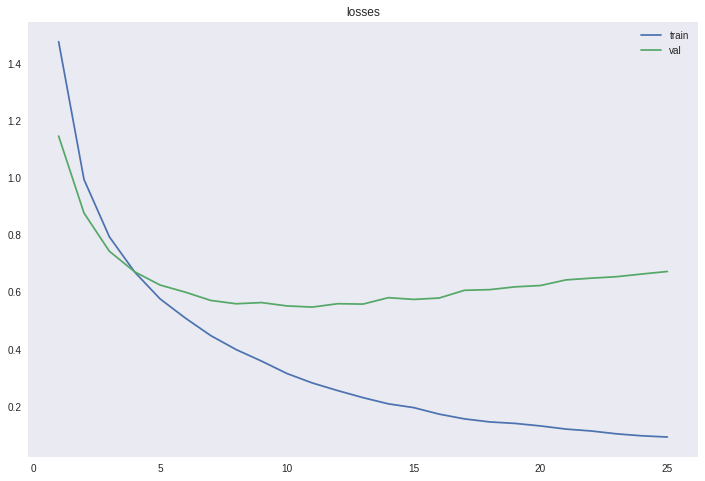

Final results:
  test accuracy:		82.40 %
Feed more!


In [18]:
num_epochs = 25
batch_size = 64

train_scores = []
val_scores   = []

train_losses = []
val_losses   = []

learningstep_param = 0.00045
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        
        print('Epoch {}...'.format(epoch + 1))
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        
#         optimizer_step = tf.train.AdamOptimizer(learning_rate=learningstep_param).minimize(loss, global_step=glstep)
        
        learningstep_param /= 1.03
        print('learning step', learningstep_param)
      
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            inputs, targets = batch
#             print('debug#1 ', type(inputs), type(targets))


            
            train_loss_batch, train_acc_batch = train_fn(inputs, targets, sess, learningstep_param)
   
            train_loss += train_loss_batch
    
#             print('batch loss', train_loss_batch, 'acc', train_acc_batch)
            
            train_acc += train_acc_batch
            train_batches += 1
      
        train_losses.append(train_loss / train_batches)
        train_scores.append(train_acc / train_batches)
    
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_val, y_val, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
            
        val_losses.append(valid_loss / valid_batches)
        val_scores.append(valid_acc / valid_batches)
    
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
#         print("  train loss:\t\t{}{}".format(type(train_loss), type(train_batches)))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
#         print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches *))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))
    
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(1, num_epochs+1), train_scores, label='train')
    plt.plot(np.arange(1, num_epochs+1), val_scores, label='val')
    plt.legend()
    plt.grid()
    plt.title('scores')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(1, num_epochs+1), train_losses, label='train')
    plt.plot(np.arange(1, num_epochs+1), val_losses, label='val')
    plt.legend()
    plt.grid()
    plt.title('losses')
    plt.show()
    
    # TEST SCORE ---------------------------------------------------------------
    
    test_acc = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, 500):
        inputs, targets = batch
        _, acc = eval_fn(inputs, targets, sess)
        test_acc += acc
        test_batches += 1
    print("Final results:")
    print("  test accuracy:\t\t{:.2f} %".format(
        test_acc / test_batches * 100))

    if test_acc / test_batches * 100 > 92.5:
        print("Achievement unlocked: mage 80 lvl")
    else:
        print("Feed more!")

### Hi, my name is `Eduard Cifarwalker`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

#### Copypaste the example from tensorflow MNIST tutorial

* firstly **a lot** of pain with determining how TensorFlow idealogically works and a lot of mistakes like 'uninitialized variables'

* tried to modify example a bit, that gave me a first prototype. It is not learning at all, score around 15%. Seems like it just ignoring all the progress and starts with 1st epoch. Cons I found that i'm stupid and i'm initializing network parts every time

* think that scaling input data may be a good idea

* added maxpool layers everywhere. Works worse. After that i've decided to remove some of them, works better, around 55% val score

* found that several conv layers works better

* playing with conv kernel sizes and number of filters. Seems like large amount of complex filters works slow, but you can just get  the same score with simplier model

* found that if conv layers have increasing kernel size, it works better

* remembered that some of CS231n lectures told us about batch normalization. Added somewhere, slight increase in val score

* came to idea that behaviour 1 FC at the end layer defines is too simple, tried to add one more dense layer with 0.5 dropouts, works much better

* playing with regularizaton (trying to add to different places, varying the lambda coeff). Not working at all

* playing with activation fucntions (sigm and tanh works worse, elu no difference)

* came to idea of adaptive step for Adam Optimizer, gave me additional 0.5% on validation, total 80%

* anyway tried to change the structure of network, added more conv layers with simple kernels, that gave me 82%

* that time i've totally tired